In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set() # matplot lib defaults
plt.rcParams['figure.figsize'] = (12, 8)
%config InlineBackend.figure_format='retina'

In [4]:
# find the notebook the saved figures came from
fig_prefix='../figures/jq-'

In [5]:
from IPython.display import FileLink
FileLink('./data_cleanup.ipynb')

/Users/jing/Documents/LambdaSchool/lambda_lab/notebooks/data_cleanup.ipynb

In [6]:
df = pd.read_sql_table('data', 'sqlite:///../data/mydb.db')  

In [7]:
df.head(3)

,id,market,product,country,date,retail,wholesale,currency,year,month,day,week
0,0,Bujumbura,Maize,Burundi,2011-10-04,NaN,548798.0,BIF,2011.0,10.0,4.0,40.0
1,1,Bujumbura,Maize,Burundi,2011-10-05,NaN,549000.0,BIF,2011.0,10.0,5.0,40.0
2,2,Bujumbura,Maize,Burundi,2011-10-06,NaN,498970.0,BIF,2011.0,10.0,6.0,40.0


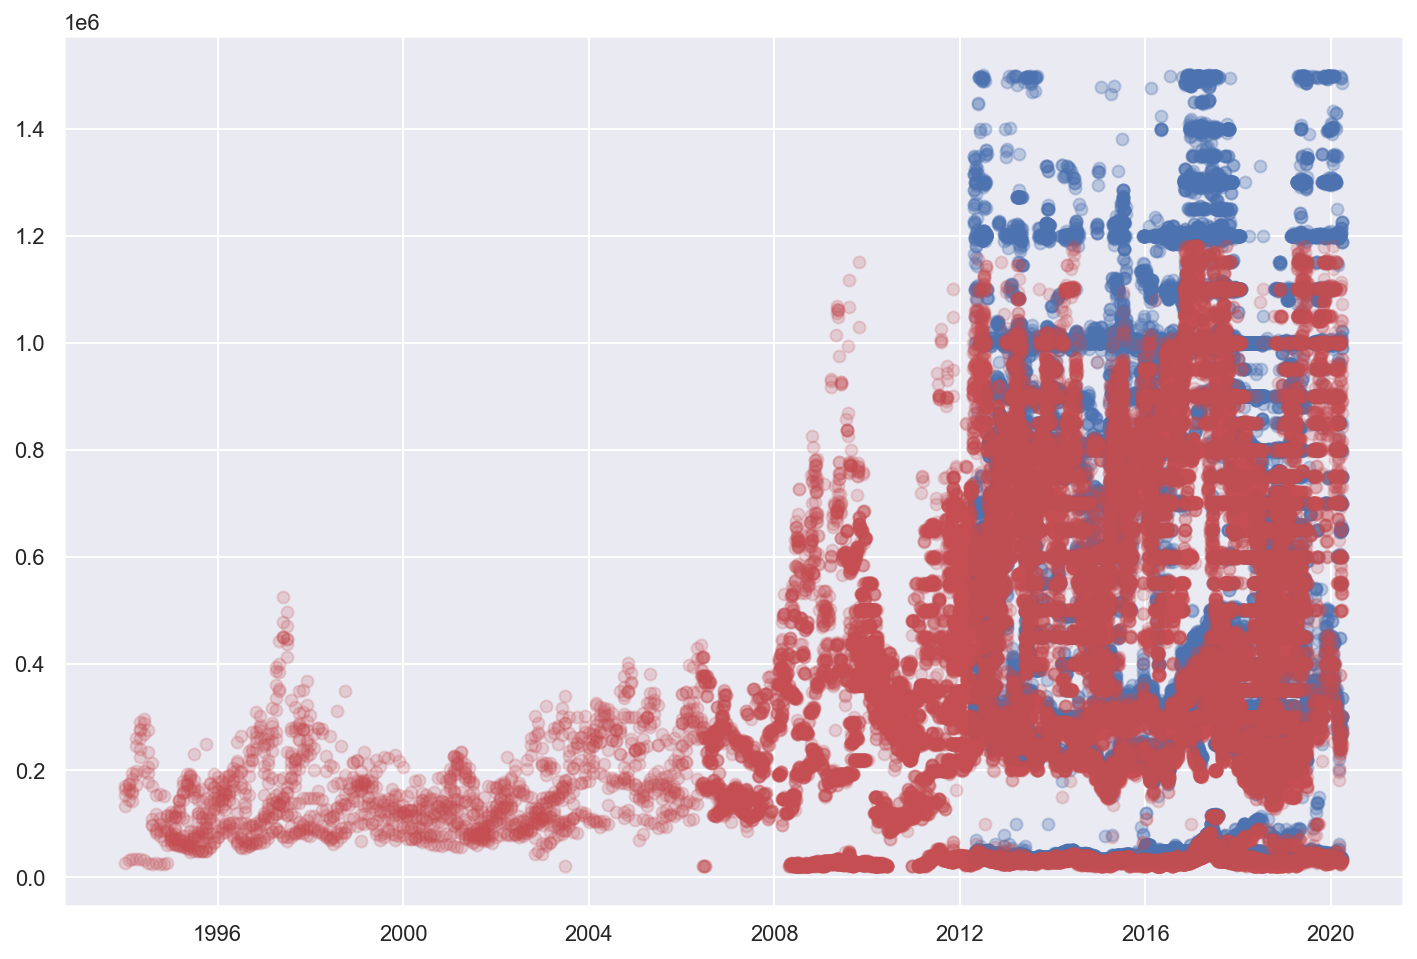

In [8]:
fig = plt.figure()
ax = fig.gca()
ax.scatter(df['date'], df['retail'], c = 'b', alpha=0.3)
ax.scatter(df['date'], df['wholesale'], c = 'r', alpha=0.2)
#ax.set_yscale('log')
plt.show()

Following work will be focused on retail price:
Note: no data before 2012 on wholesale price. 

In [9]:
condition = ( df['product']=='Maize')
df = df[condition]
df.head()

,id,market,product,country,date,retail,wholesale,currency,year,month,day,week
0,0,Bujumbura,Maize,Burundi,2011-10-04,NaN,548798.0,BIF,2011.0,10.0,4.0,40.0
1,1,Bujumbura,Maize,Burundi,2011-10-05,NaN,549000.0,BIF,2011.0,10.0,5.0,40.0
2,2,Bujumbura,Maize,Burundi,2011-10-06,NaN,498970.0,BIF,2011.0,10.0,6.0,40.0
3,3,Bujumbura,Maize,Burundi,2011-10-07,NaN,549299.0,BIF,2011.0,10.0,7.0,40.0
4,4,Bujumbura,Maize,Burundi,2011-10-10,NaN,549872.0,BIF,2011.0,10.0,10.0,41.0


In [10]:
df['currency'].unique()
df = df[df['retail']!=0]

In [11]:
markets = sorted(df['market'].unique())
colors = sns.color_palette(n_colors = len(markets))
color_dict = {key:value for key, value in zip(markets, colors)}
#color_dict

In [12]:
fig = plt.figure()
ax = fig.gca()
for market in markets:
    #print(market)
    color =color_dict[market]
    color_repeated =np.tile(np.array(color), (df[df['market'] == market].shape[0],1))
    
    ax.scatter(df[df['market'] == market]['date'],
               df[df['market'] == market]['retail'],  
               c = color_repeated, 
               s=10,
               label = market,
               alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Retail price')
plt.legend()
plt.show()

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 864x576 with 1 Axes>

visualization reveals different trends for different market, let's narrow down

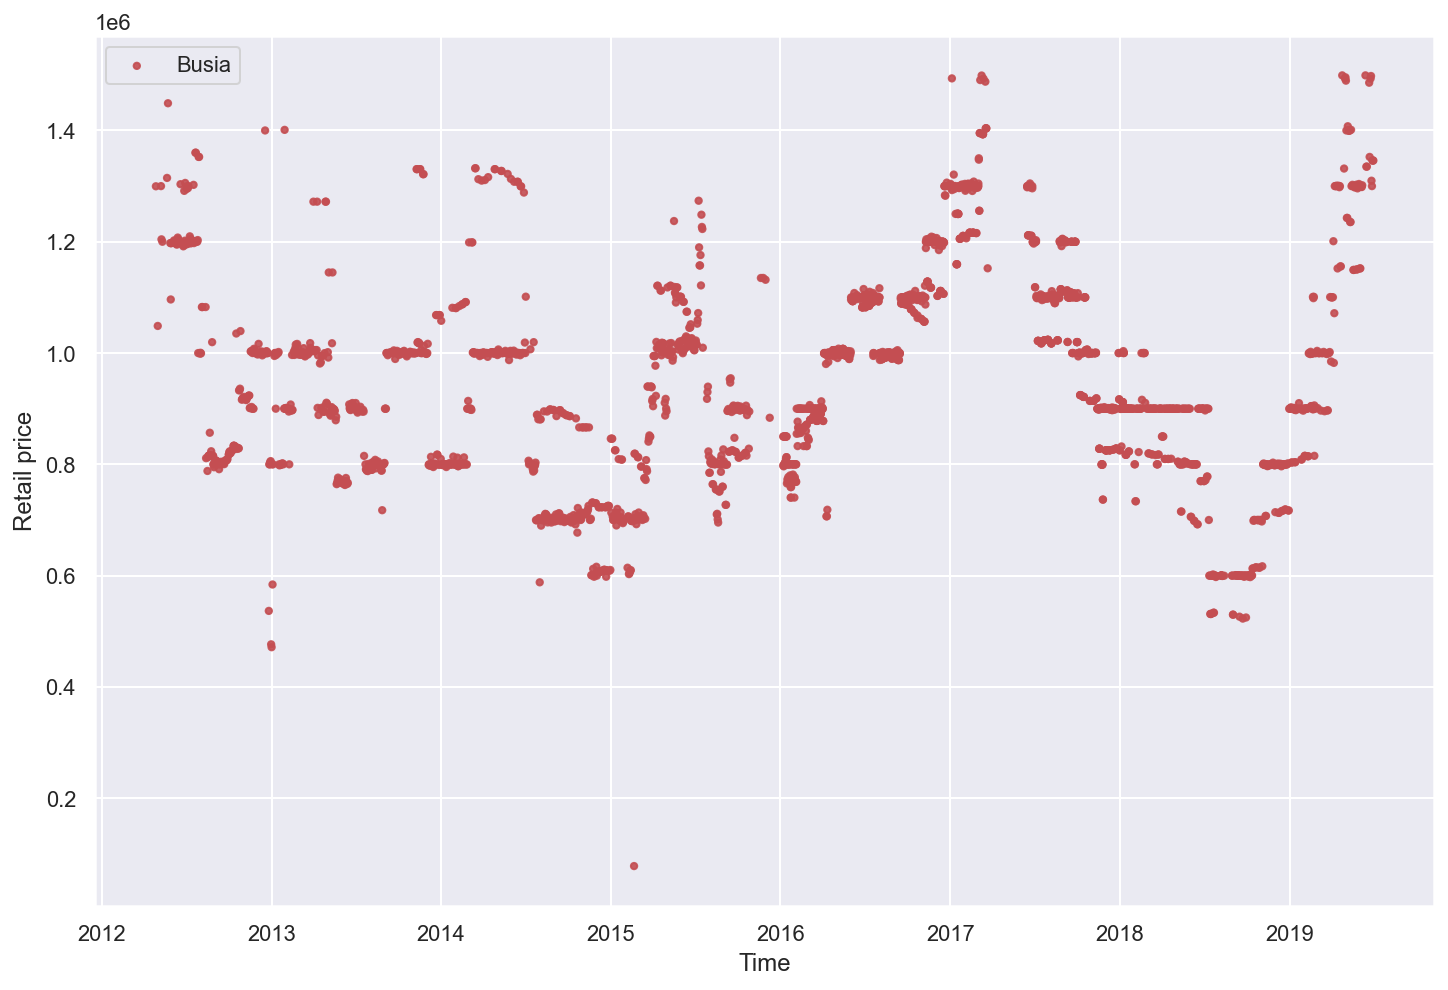

In [13]:
market = 'Busia'  #'Gitega'#, 'Bujumbura', 'Arusha']#,'Busia',  'Dar es salaam', 'Iringa']
color =color_dict[market]
color_repeated =np.tile(np.array(color), (df[df['market'] == market].shape[0],1))
#print(color_repeated)

fig = plt.figure()
ax = fig.gca()
ax.scatter(df[df['market'] == market]['date'],
           df[df['market'] == market]['retail'],
           c = color_repeated, 
           s=10, 
           label=market,
           alpha=0.9)
plt.xlabel('Time')
plt.ylabel('Retail price')
plt.legend()
plt.show()

In [14]:
# define alert price: 
def price_alert(df_series, alert_levels=3):
    '''x: df series
    alert_level: set how many stds away from the mean
    return number of standard deviation within which the value is from mean'''
    
    x = df_series.to_numpy()
    alert = x.copy()
    
    for i in range(2, x.shape[0]-2):
        alert[i] = np.nanmean(x[:i])+ alert_level * np.nanstd(x[:i])
    
    return alert

In [15]:
subset = df[df['market']=='Gitega']

alert_levels=[-3, -2, -1, 0, 1, 2, 3]
alert_cols = ['alert'+str(alert_level) for alert_level in alert_levels ]
alert_cols

for alert_level in alert_levels:
    alert_col = 'retail_alert'+str(alert_level)
    subset[alert_col] = price_alert(subset['retail'], alert_level)

<ipython-input-14-c371bd0dc38d>:11: RuntimeWarning: Mean of empty slice
  alert[i] = np.nanmean(x[:i])+ alert_level * np.nanstd(x[:i])
/Users/jing/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-15-3ca68fb6e147>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[alert_col] = price_alert(subset['retail'], alert_level)


In [16]:
subset.head()

,id,market,product,country,date,retail,wholesale,currency,year,month,day,week,retail_alert-3,retail_alert-2,retail_alert-1,retail_alert0,retail_alert1,retail_alert2,retail_alert3
2053,2053,Gitega,Maize,Burundi,2011-10-04,NaN,500016.0,BIF,2011.0,10.0,4.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054,2054,Gitega,Maize,Burundi,2011-10-05,NaN,498980.0,BIF,2011.0,10.0,5.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2055,2055,Gitega,Maize,Burundi,2011-10-06,NaN,498970.0,BIF,2011.0,10.0,6.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,2056,Gitega,Maize,Burundi,2011-10-07,NaN,499693.0,BIF,2011.0,10.0,7.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2057,2057,Gitega,Maize,Burundi,2012-04-21,737930.0,553448.0,BIF,2012.0,4.0,21.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


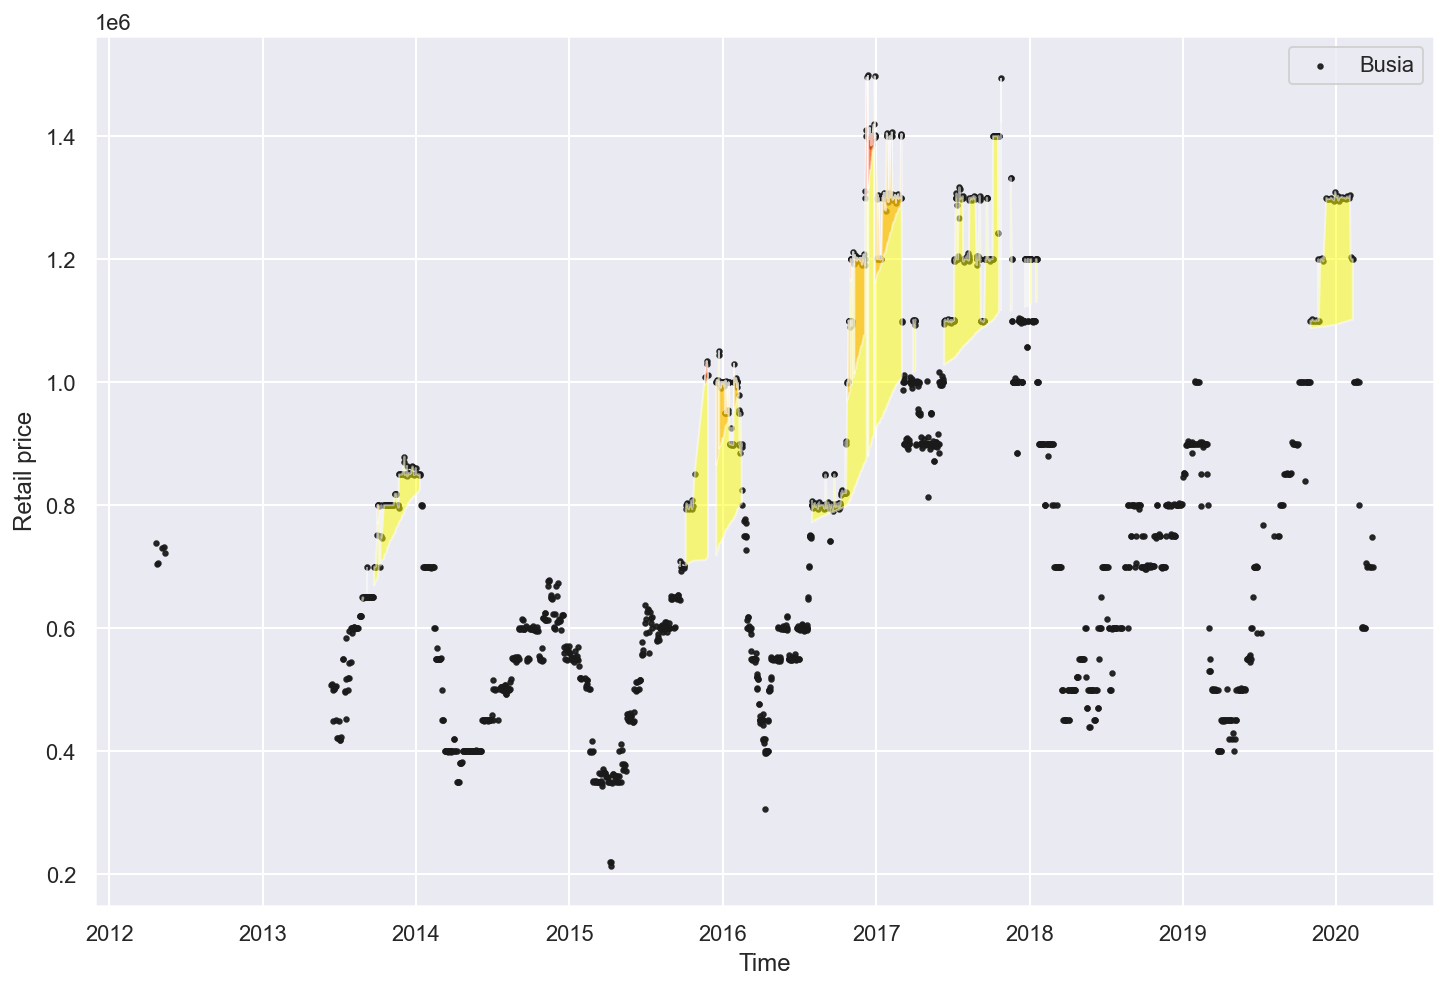

In [17]:
fig = plt.figure()
ax = fig.gca()
x = subset['date']
y = subset['retail']

y1 = subset['retail_alert1']
y2 = subset['retail_alert2']
y3 = subset['retail_alert3']

ax.scatter(x, y, c='k', s=5, label=market, alpha=0.9)

ax.fill_between(x, y, y1, where=y > y1, facecolor='yellow', alpha=0.5)
ax.fill_between(x, y, y2, where=(y > y2) & (y < y3), facecolor='orange', alpha=0.5)
ax.fill_between(x, y, y3, where=y>y3, facecolor='red', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Retail price')
plt.legend()
plt.show()

In [18]:
# since data is so ragged, use moving average (5 days) to viz the data

subset = df[df['market']=='Gitega'][['date', 'retail']]
subset.head()

,date,retail
2053,2011-10-04,NaN
2054,2011-10-05,NaN
2055,2011-10-06,NaN
2056,2011-10-07,NaN
2057,2012-04-21,737930.0


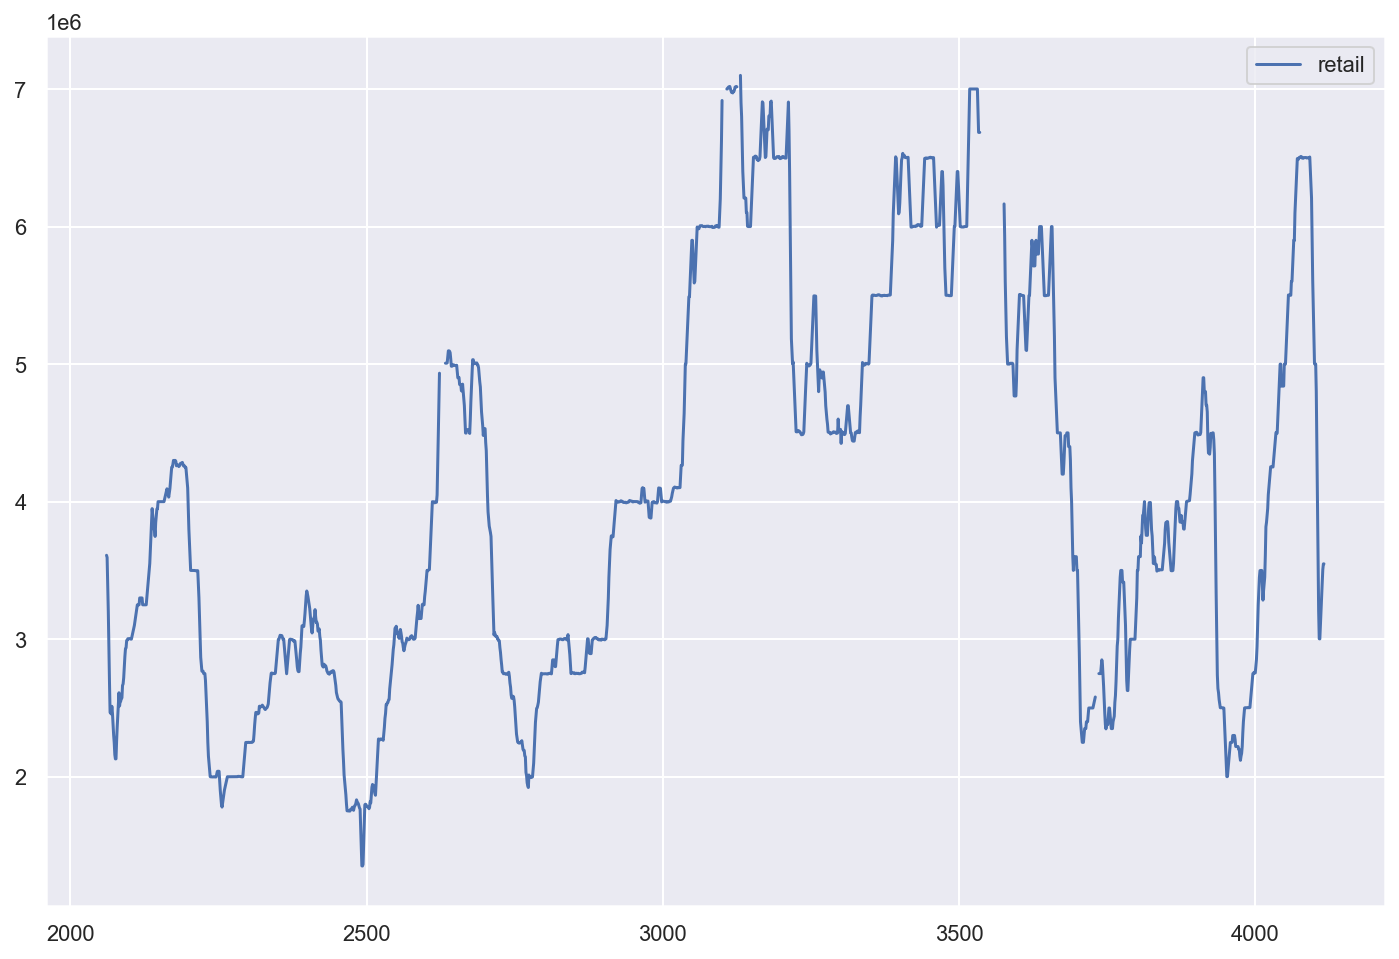

In [19]:
subset_mv = subset.rolling(5).sum()
subset_mv.plot()